In [1]:
import csv
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [2]:
#pd.read_csv?

In [3]:
ds=pd.read_csv("empl.csv")
ds

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN
5,6,Geet,NaN,HongKong,Asia,30007.0
6,7,Steven,43.0,BayArea,America,8300.0
7,8,Ram,38.0,Hyderabad,Asia,54666.0
8,9,hari,50.0,newyork,America,67666.0
9,11,yami,NaN,newyork,America,8888.0


In [4]:
ds.drop(["Name"],axis=1,inplace=True)

<AxesSubplot:>

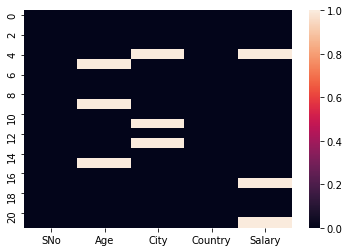

In [5]:
sns.heatmap(ds.isna())

In [6]:
ds.isnull().sum()

SNo        0
Age        3
City       3
Country    0
Salary     3
dtype: int64

In [7]:
#ds.dropna(axis=0, inplace=True)
#drop the rows with null value 

In [8]:
#df.drop("Age", axis=1, inplace=True)
#THIS WILL DROP THE WHOLE COLUMN

In [9]:
#ds["salary"]=pd.replace(np.nan,ds["salary"].mean)
#ds["salary"]=pd.replace(np.nan,ds["salary"].median)

# Simple imputer 

Sklearn.impte simple imputer works for imputing nll values in object or categorical data or object data 

In [10]:
from sklearn.impute import SimpleImputer 
imp=SimpleImputer (strategy ="most_frequent")
#'mean', 'median', 'most_frequent', 'constant'
ds["City"]=imp.fit_transform (ds["City"].values.reshape(-1,1))
ds

,SNo,Age,City,Country,Salary
0,1,28.0,Toronto,Canada,20000.0
1,2,31.0,Edmonto,Canada,3900.0
2,3,34.0,Toronto,Canada,8000.0
3,4,26.0,HongKong,Asia,66672.0
4,5,30.0,HongKong,America,NaN
5,6,NaN,HongKong,Asia,30007.0
6,7,43.0,BayArea,America,8300.0
7,8,38.0,Hyderabad,Asia,54666.0
8,9,50.0,newyork,America,67666.0
9,11,NaN,newyork,America,8888.0


In [11]:
imp1=SimpleImputer (strategy ="mean")
ds["Salary"]=imp1.fit_transform (ds["Salary"].values.reshape(-1,1))
ds["Age"]=imp1.fit_transform (ds["Age"].values.reshape(-1,1))
ds

,SNo,Age,City,Country,Salary
0,1,28.000000,Toronto,Canada,20000.000000
1,2,31.000000,Edmonto,Canada,3900.000000
2,3,34.000000,Toronto,Canada,8000.000000
3,4,26.000000,HongKong,Asia,66672.000000
4,5,30.000000,HongKong,America,33739.947368
5,6,32.421053,HongKong,Asia,30007.000000
6,7,43.000000,BayArea,America,8300.000000
7,8,38.000000,Hyderabad,Asia,54666.000000
8,9,50.000000,newyork,America,67666.000000
9,11,32.421053,newyork,America,8888.000000


# Label encoder - Sklearn 

In [12]:
le=LabelEncoder()

list1=["City","Country"]
for val in list1:
    ds[val]=le.fit_transform(ds[val].astype(str))
    #as type describes that the data present are in str format
    
ds

,SNo,Age,City,Country,Salary
0,1,28.000000,8,3,20000.000000
1,2,31.000000,3,3,3900.000000
2,3,34.000000,8,3,8000.000000
3,4,26.000000,5,2,66672.000000
4,5,30.000000,5,1,33739.947368
5,6,32.421053,5,2,30007.000000
6,7,43.000000,1,1,8300.000000
7,8,38.000000,6,2,54666.000000
8,9,50.000000,9,1,67666.000000
9,11,32.421053,9,1,8888.000000


# Get dummies -from pandas 

In [13]:
city_dummies=pd.get_dummies(ds.City)
city_dummies

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,1


In [14]:
ds=pd.concat([ds,city_dummies],axis=1)
ds



,SNo,Age,City,Country,Salary,0,1,2,3,4,5,6,7,8,9
0,1,28.000000,8,3,20000.000000,0,0,0,0,0,0,0,0,1,0
1,2,31.000000,3,3,3900.000000,0,0,0,1,0,0,0,0,0,0
2,3,34.000000,8,3,8000.000000,0,0,0,0,0,0,0,0,1,0
3,4,26.000000,5,2,66672.000000,0,0,0,0,0,1,0,0,0,0
4,5,30.000000,5,1,33739.947368,0,0,0,0,0,1,0,0,0,0
5,6,32.421053,5,2,30007.000000,0,0,0,0,0,1,0,0,0,0
6,7,43.000000,1,1,8300.000000,0,1,0,0,0,0,0,0,0,0
7,8,38.000000,6,2,54666.000000,0,0,0,0,0,0,1,0,0,0
8,9,50.000000,9,1,67666.000000,0,0,0,0,0,0,0,0,0,1
9,11,32.421053,9,1,8888.000000,0,0,0,0,0,0,0,0,0,1


In [19]:
import numpy 

ds["City"].replace(9,numpy.NaN,inplace=True)
ds

,SNo,Age,City,Country,Salary,0,1,2,3,4,5,6,7,8,9
0,1,28.000000,8.0,3,20000.000000,0,0,0,0,0,0,0,0,1,0
1,2,31.000000,3.0,3,3900.000000,0,0,0,1,0,0,0,0,0,0
2,3,34.000000,8.0,3,8000.000000,0,0,0,0,0,0,0,0,1,0
3,4,26.000000,5.0,2,66672.000000,0,0,0,0,0,1,0,0,0,0
4,5,30.000000,5.0,1,33739.947368,0,0,0,0,0,1,0,0,0,0
5,6,32.421053,5.0,2,30007.000000,0,0,0,0,0,1,0,0,0,0
6,7,43.000000,1.0,1,8300.000000,0,1,0,0,0,0,0,0,0,0
7,8,38.000000,6.0,2,54666.000000,0,0,0,0,0,0,1,0,0,0
8,9,50.000000,NaN,1,67666.000000,0,0,0,0,0,0,0,0,0,1
9,11,32.421053,NaN,1,8888.000000,0,0,0,0,0,0,0,0,0,1


#Here we can use simpleimputer again 